## Visualizing Iris dataset in Python (13 July, 2017)

In this tutorial, we consider Iris flower data set and visualize the data and analyze the distribution by plotting it in various ways. First let us look at the data by importing pandas and reading the comma separated values file into our environment

In [1]:
# We read the data into a pandas' DataFrame. 
# so, we import pandas library and load the iris flower dataset, which is in the location "../input/" directory
import pandas as pd

# To visualize data, we need to import a library called matplotlib
import matplotlib.pyplot as plt 

# To draw attractive statistical graphics, we import seaborn package
import seaborn as sns
sns.set(style="white", color_codes=True)

iris = pd.read_csv('./input/Iris.csv') #Now the data is loaded into pandas' DataFrame df

# print first few lines of the data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


From the first few lines of the data, we can see that there are 4 features, all of them are floats. 

In [2]:
# Lets see how many data points (observations) are there in each class 
# (There are three flower species in the data: Iris-setosa, Iris-versicolor, Iris-verginica)
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

We can observe that there are three different classes and there are 50 data points in each class. This is one of the best dataset which has equal distribution of data points in each class. But in real world, data is clumsy.

Let's visualize the data and try to make some sense out of it. The basic visualization technique would be to *scatter* the data onto a 2D plot. 

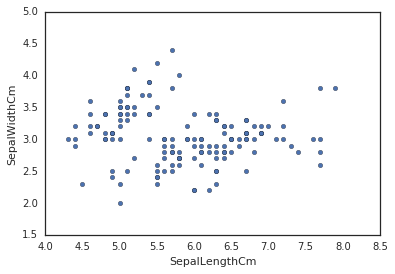

In [3]:
# We can plot the data by using a method called plot() on the object 'iris'
# We need to import a library called matplotlib to plot data
# Since we can plot a 2D scatter plot, let's consider any of the two features as x and y-axes.

%matplotlib inline
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")


From the above plot, we are not able to distinguish the type of **Species** each data point belongs to. So, it would be better visualized if we have some color scheme to identify the Species directly. We can do this by using the library *seaborn*, we need to import it. 

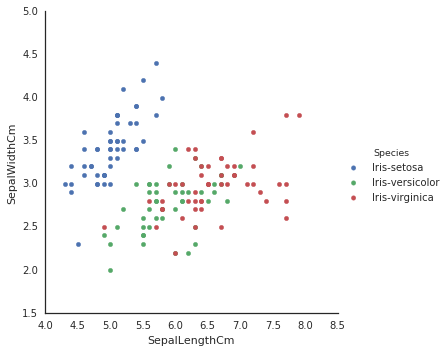

In [4]:
#FacetGrid() creates an axis (without the axis names) and considers "Species" to be colored according to its class.
#map() creates a scatter plot with the two features as the axis.
#add_legend() adds the legend for the plot
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
    .add_legend()

Let's also visualize the data points in the other combinations: 
1. x = SepalLengthCm, y = PetalLengthCm
2. x = SepalLengthCm, y = PetalWidthCm
3. x = SepalWidthCm, y = PetalLengthCm
4. x = SepalWidthCm, y = PetalWidthCm
5. x = PetalLengthCm, y = PetalWidthCm

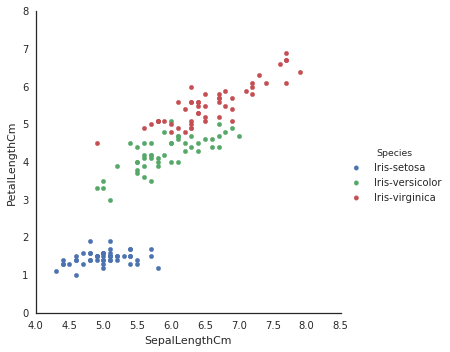

In [5]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(plt.scatter, "SepalLengthCm", "PetalLengthCm")\
    .add_legend()

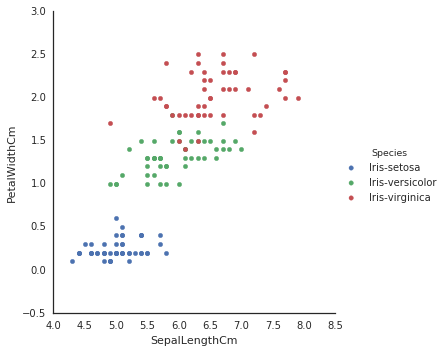

In [6]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(plt.scatter, "SepalLengthCm", "PetalWidthCm")\
    .add_legend()

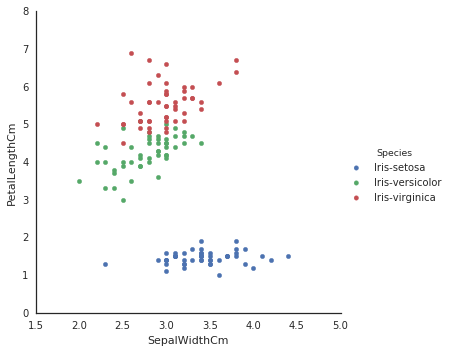

In [7]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(plt.scatter, "SepalWidthCm", "PetalLengthCm")\
    .add_legend()

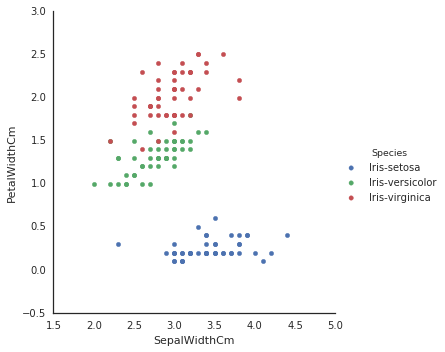

In [8]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(plt.scatter, "SepalWidthCm", "PetalWidthCm")\
    .add_legend()

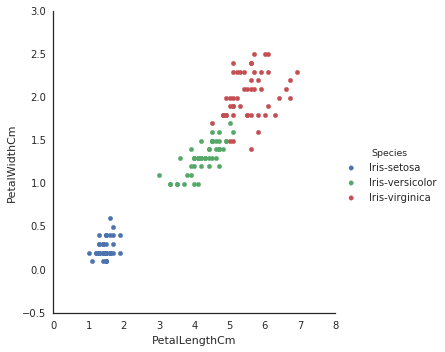

In [9]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(plt.scatter, "PetalLengthCm", "PetalWidthCm")\
    .add_legend()

We can actually plot all the combinations of the features in a single plot using seaborn as a pairplot. It is a bivariate relation between each pair of features. 

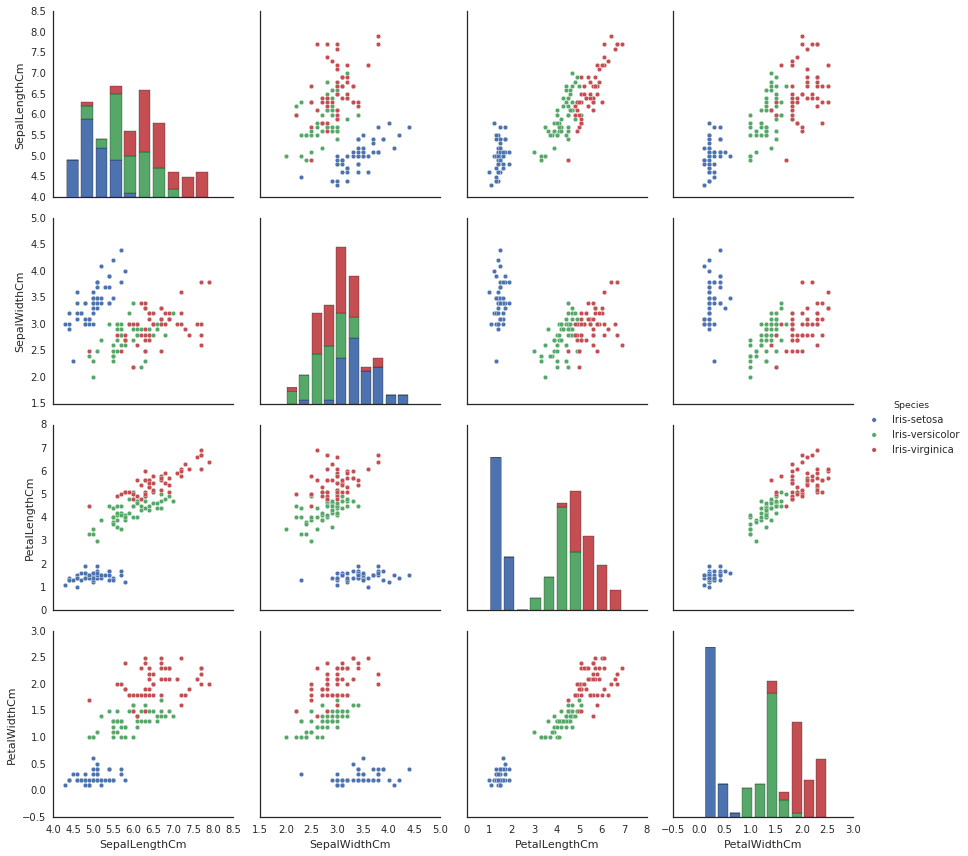

In [10]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

In the above pairplot, we can see that it is a 4x4 symmetric grid (so we need to consider either lower triangular elements or the higher triangular elements) with the diagonal elements as probability distribution over the corresponding column. We shall first analyze the scatter plots and then look at the distributions (histograms). 
### Observations
* After examining each of the scatter plot, we can see that the class Iris-setosa (blue dots) can easily be distinguished from the other classes, just by drawing a separation line. Whereas, Iris-versicolor and Iris-virginica doesn't appear to be separated in almost all the plots. 
* If we consider *SepalLengthCm* and *SepalWidthCm*, we cannot separate Iris-vergnica and Iris-versical, as the distribution of two classes are overlapped. 
* One good choice would be to consider *PetalLengthCm* and *PetalWidthCm* as our key features. If we observe the scatter plot of *PetalLengthCm* vs *PetalWidthCm*, we can draw a separation line which can classify most of the datapoints as its correct Species. Although there can be some misclassifications as the distributions of these two classes are overlapped. So, from the above pairplot, we can conclude that *PetalLengthCm* and *PetalWidthCm* play a vital role in classification. 

Let's plot the 1D distribution (univariate relation) of each feature.  

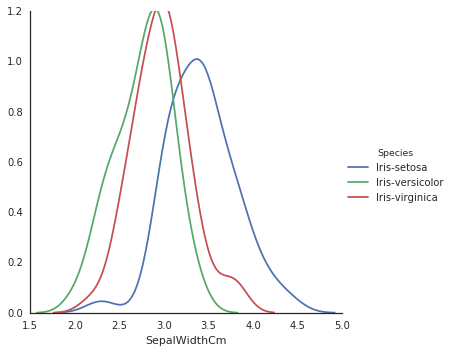

In [11]:
sns.FacetGrid(iris, hue="Species", size=5)\
.map(sns.kdeplot, "SepalWidthCm")\
.add_legend()

Clearly, SepalWidthCm cannot be a good feature to classify. We cannot distinguish Iris-versicolor and Iris-verginica. Also, about 50% of the distribution of Iris-setosa is overlapped with both the other species. 

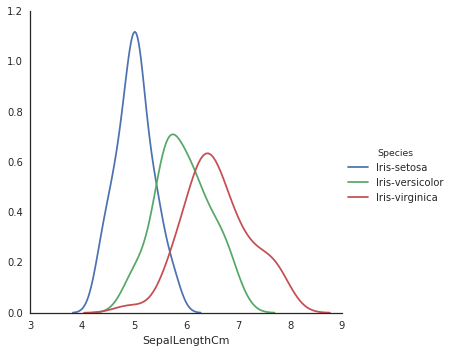

In [12]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(sns.kdeplot, "SepalLengthCm")\
    .add_legend()

From the above plot, we can see that SepalLengthCm may not play a key role in classifying the data points correctly. From the list of observations, we have concluded that *PetalLengthCm* and *PetalWidthCm* can do classify better. Let's look at its univariate distribution of these features. 

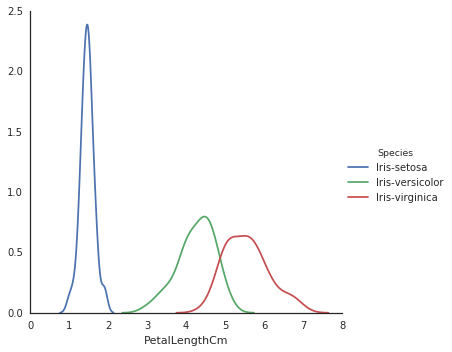

In [13]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(sns.kdeplot, "PetalLengthCm")\
    .add_legend()

This univariate distribution over *PetalLengthCm* looks better separable than the former two features, though red and green have an overlapped distribution. Let's look at the distribution over the final feature and then try to visualize the bivariate distribution over *PetalLenghtCm* and *PetalWidthCm*. We shall also analyze the risk minimization of making a classification error over *PetalLengthCm vs PetalWidthCm*.

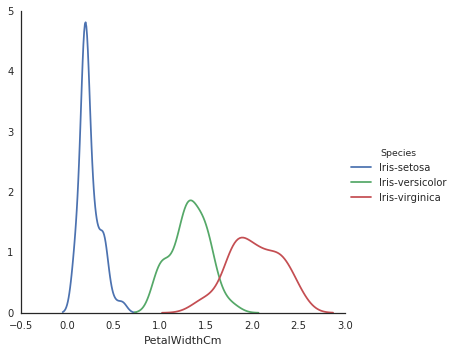

In [14]:
sns.FacetGrid(iris, hue="Species", size=5)\
    .map(sns.kdeplot, "PetalWidthCm")\
    .add_legend()

Both the univariate distributions of *PetalLengthCm* and *PetalWidthCm* look similar. Here we shall give an indepth analysis in terms of risk minimization. 

## Risk Minimization
Let us consider a simple case of two-class classification problem, analyze the risk minimization and then look at n-class classification problem, in general. 

Let us call the actual species to which $x$ belongs to as the **_true class_**, $\theta$. Let us denote the class *Iris-versicolor* as $\theta_1$ and *Iris-virginica* as $\theta_2$, for our convinience. Since the true class $(\theta)$ is so unpredictable, we consider $\theta$ to be a variable that must be defined probabilistically. 

Let's assume that the classes $\theta_1$ and $\theta_2$ are associated with a prior probabilities, $P(\theta_1)$ and $P(\theta_2)$, respectively. There are predominantly the fraction of $\theta_1$'s and $\theta_2$'s present in the given dataset. 

For simplicity, let's ignore the presence of the third class *Iris-setosa* and assume we have only two classes $\theta_1$ and $\theta_2$. 

$\therefore P(\theta_1)+P(\theta_2)=1$ is immediate from the above assumption. 

We consider $x$ to be a continuous random variable whose distribution depends on the true class $\theta$, and is expressed as $P(x|\theta)$. Since we are conditioning $x$ over its class, we call $P(x|\theta)$ as *class-conditional probability density*. This is the probability density function for $x$ given the true class is $\theta$, $P(x|\theta_1)$ for class $\theta_1$ and $P(x|\theta_2)$ for class $\theta_2$. These probability density functions, $P(x|\theta_j)$, are also called the $likelihood$ of $\theta_j$ with respect to $x$, meaning that for a given observation $x$, how "likely" the class $\theta_j$ to be the true class. 

Suppose we know the priors and the conditional probabilities (likelihoods), we can find the posterior probabilites $P(\theta_j|x)$ as follows:

$$P(\theta_j|x) = \frac{P(\theta_j,x)}{P(x)}$$
$$P(\theta_j|x) = \frac{P(x|\theta_j)P(\theta_j)}{P(x)}$$
which is called $Bayes' formula$.
Intuitively, we can say that posterior probability is proportional to the product of prior and the likelihood. We can neglect $P(x)$ as it can be viewed as a scale factor. 

Now coming back to our classification problem, for an observation $x$ for which $P(\theta_1|x)$ is greater than $P(\theta_2|x)$, we inclined to categorize $x$ as class $\theta_1$. Similarly, if we found $P(\theta_2|x)$ is greater than $P(\theta_1|x)$, we inclined to categorize $x$ as class $\theta_2$. By eliminating the scale factor, we obtain the following decision rule:

$$\text{Decide }\theta_1 \text{if } P(x|\theta_1)P(\theta_1) > P(x|\theta_2)P(\theta_2); \text{Otherwise decide }\theta_2$$

Whatever decision we make based on the above rule, there is a chance that the decision is not correct. So, let us calculate the probability of error for a given obesrvation $x$, $P(error|x)$ as follows:
$$
P(error|x)=
\begin{cases}
    P(\theta_1|x), & \text{if we decide } \theta_2\\
    P(\theta_2|x), & \text{if we decide } \theta_1
\end{cases}$$

Clearly, for a given $x$ we can minimize the probability of error by deciding $\theta_1$ if $P(\theta_1|x)>P(\theta_2|x)$ and otherwise $\theta_2$. 

We can see that this rule minimizes the average probability of error, because the average probability of error can be given by:

$$P(error) = \int_{-\infty}^{\infty} P(error,x) dx = \int_{-\infty}^{\infty} P(error|x)P(x) dx$$

If for every $x$, we insure that P(error|x) is minimum, then the integral must be as minimum as possible. This indeed justifies the *Bayes' Rule*. So, we can rewrite $P(error|x)$ as:
$$P(error|x) = \min\{P(\theta_1|x), P(\theta_2|x)\}$$

There are some special cases like if the posterior probabilities are equal, i.e., $P(\theta_1|x)=P(\theta_2|x)$, then the particular observation gives us no information about the true class. In that case, the decision hinges on the prior probabilities. On the other hand, if the priors $P(\theta_1)$ and $P(\theta_2)$ are equal, then the decision depends on the likelihoods $P(\theta_1|x)$ and $P(\theta_2|x)$. In general, both these factors are important in decision making, and the Bayes' rule combines these two to achieve minimum probability of error. Here is a plot of univariate distribution over *PetalWidthCm* for classes Iris-versicolor and Iris-virginica.


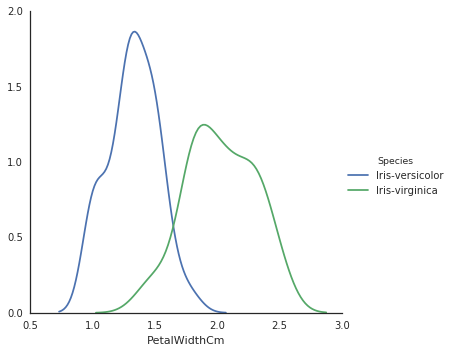

In [15]:
# Considering only required classes "virginica" and "versicolor"
two_class = iris[iris.Species != "Iris-setosa"]

# plotting the univariate distribution over the feature "PetalWidthCm"
sns.FacetGrid(two_class, hue="Species", size=5)\
    .map(sns.kdeplot, "PetalWidthCm")\
    .add_legend()

### Error Probabilities 
Consider the univariate distribution of Iris-versicolor vs Iris-virginca considering the feature *PetalWidthCm* as shown above. We can visualize that distributions are overlapped. So, we cannot predict the class labels of new flowers exactly. Without loss of generality, we assume that the given observations are i.i.d. To distinguish the predicted class from the actual class, we denote the predicted class as $\hat{\theta}_j$. 

There are two ways a classification error may occur:
1. The observation $x$ may fall in the region $R_2$ (red region in the graph) and the true class is $\theta_1$, $P(x\in R_2,\theta_1)$. In other words, we may classify $x$ as $\hat{\theta}_2$ but its actual class is $\theta_1$.
2. The observation $x$ may fall in the region $R_1$ (yellow region in the graph) and the true class is $\theta_2$, $P(x\in R_1,\theta_2)$. In other words, we may classify $x$ as $\hat{\theta}_1$ but its actual class is $\theta_2$.

Since these events are mutually independent, the probability of error can be defined as:
$P(error) = P(x\in R_2,\theta_1) + P(x\in R_1,\theta_2)$

Each of these terms can be defined in terms of their conditional probabilities as follows:
$$P(error) = P(x\in R_2|\theta_1)P(\theta_1)+P(x\in R_1|\theta_2)P(\theta_2)$$

The term $P(x\in R_2|\theta_1)$ is the probability that the observation $x$ falls in the region $ R_2$ given that $x$ actually is of class $\theta_1$. Similarly, the term $P(x\in R_1|\theta_2)$ is the probability that the observation $x$ falls in the region $ R_1$ given that $x$ actually is of class $\theta_2$. These probabilities are the density functions which are equivalent to the area under the specified region. So, each term can be replaced by it equivalent area under the curve, $\int_{R_i}P(x|\theta_j)dx,$ where $i,j\in\{1,2\}, i\neq j$,

$$P(error) = \int_{ R_2}P(x|\theta_1)P(\theta_1) dx + \int_{ R_1}P(x|\theta_2)P(\theta_2) dx$$

This can be visualized in the figure below.
<img src="./input/error_prob.jpg" height="400" width="400"> 
*The region shaded in yellow represents the probability of errors for deciding $\theta_1$ but they are actually of class $\theta_2$. And the region shaded in red represents the converse.* Since the decision boundary $x^*$ (and hence the regions $ R_1$ and $ R_2$) for the figure are chosen arbitrarily, the probability of errors may seem to be higher than they might be. The **_reducible error_** can be eliminated by moving the decision boundary $x^*$ to a point where both the distributions have equal posterior probabilities, $x_B$. This makes the total shaded area to be as minimum as possible.

In other words, if $P(x|\theta_1)P(\theta_1) > P(x|\theta_2)P(\theta_2)$ it is advantageous to classify $x$ as $\theta_1$ (or to be in $R_1$) so that the smaller quantity will contribute to the error integral. 

This inturn justifies the Bayes' theorem (Why?). So, $x_B$ is called the Bayes decision and $P(error)$ is the Bayes error rate. 

In multiclass classification case, we can do one-vs-all but there are more cases for computing $error$ than computing $correct$. So, the probability of classifying the vector of random variables **X** over $c$ classes is 

$$P(correct)=\sum_{j=1}^{c} P(X|\theta_j)P(\theta_j)$$
or
$$P(correct)=\sum_{j=1}^{c} P(X\in R_j)P(\theta_j)$$
This is the sum of probabilities of deciding $x$ to be in $R_j$ (and hence predicting $\theta_j$) and it actually belongs to $\theta_j$. The average probability of error can be given by, 

$$ \begin{equation*}
\begin{split}
    P(error) & = 1 - P(correct)\\
             & = 1 - \sum_{j=1}^{c} P(X\in R_j)P(\theta_j)\\
             & = 1 - \sum_{j=1}^{c} \int_{R_j}P(x|\theta_j)P(\theta_j) dx
\end{split}
\end{equation*}
$$

The Bayes classifier maximizes $P(correct)$ by choosing the regions so that the integrand is maximum for all $X$, hence no other classifier can yield a smaller probability than this. 

## Error Bounds for Gaussian Distributions
Though the Bayesian decision rule gives us the lowest average error rate, but these results do not tell what the error probability actually is. Often times it is quite difficult to compute the error rate for Gaussian distributions, especially if the data is high dimensional. So, there is a need to define some upper bounds for the probability of errors. 

We can bound the tail probabilities using four methods:
* Markov Inequality
* Chebyshev's Inequality
* Chernoff Bound
* Bhattacharyya Bound

### 1. Markov Inequality
It says that if *nonnegative* random variable has a small mean, then the probability that it takes a large value must also be small. In other words, if a random variable is always *nonnegative*, it is unlikely that it greatly exceeds its expectation. More formally, we can define the Markov inequality as:

$$P(X\geq a) \leq \frac{E[X]}{a}, \forall a>0, \text{where X is a nonnegative random variable} $$

as $a\to\infty$, $\frac{E[X]}{a} \to 0$ because E[X] is small. 

So coming back to our Iris dataset, we can apply Markov Inequality for this distribution since the data we are considering is lengths and widths of sepal and petal of each flower, they cannot be negative. Remember that we need to find a bound on error probability, $P(error)$.
$$P(error) = \int_{-\infty}^{\infty} P(error|x)p(x) dx$$
<font color='red'> I think we need to define the random variable for error. We know that $P(error) = P(x\in R_2,\theta_1) + P(x\in R_1,\theta_2)$ 

So, we need to find the bounds for $P(x\in R_2,\theta_1)$ and $P(x\in R_1,\theta_2)$. Let us breakdown each of these terms and try to find bound. 

$$P(x\in R_2,\theta_1) = P(x\in R_2|\theta_1)P(\theta_1)$$ Then what???

</font>

### 2. Chebyshev's Inequality
